In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
import datetime
import epiweeks

# Read CSV

In [3]:
data_path = 'Data/COVID_cases&deaths.csv'

In [4]:
covid_dataset = pd.read_csv(data_path)
covid_dataset.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## Filter by continent

In [5]:
print(f'The continents are: {pd.unique(covid_dataset.continent)}')

The continents are: ['Asia' nan 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


In [6]:
covid_dataset_america = covid_dataset.loc[(covid_dataset['continent'] == 'North America') | (covid_dataset['continent'] == 'South America')]
covid_dataset_america.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
4915,AIA,North America,Anguilla,2020-03-28,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81.88,NaN,NaN,NaN,NaN,NaN
4916,AIA,North America,Anguilla,2020-03-29,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81.88,NaN,NaN,NaN,NaN,NaN
4917,AIA,North America,Anguilla,2020-03-30,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81.88,NaN,NaN,NaN,NaN,NaN
4918,AIA,North America,Anguilla,2020-03-31,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81.88,NaN,NaN,NaN,NaN,NaN
4919,AIA,North America,Anguilla,2020-04-01,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81.88,NaN,NaN,NaN,NaN,NaN


In [7]:
print(f'The continents are: {pd.unique(covid_dataset_america.location)}')

The continents are: ['Anguilla' 'Antigua and Barbuda' 'Argentina' 'Aruba' 'Bahamas' 'Barbados'
 'Belize' 'Bermuda' 'Bolivia' 'Bonaire Sint Eustatius and Saba' 'Brazil'
 'British Virgin Islands' 'Canada' 'Cayman Islands' 'Chile' 'Colombia'
 'Costa Rica' 'Cuba' 'Curacao' 'Dominica' 'Dominican Republic' 'Ecuador'
 'El Salvador' 'Falkland Islands' 'Greenland' 'Grenada' 'Guatemala'
 'Guyana' 'Haiti' 'Honduras' 'Jamaica' 'Mexico' 'Montserrat' 'Nicaragua'
 'Panama' 'Paraguay' 'Peru' 'Puerto Rico' 'Saint Kitts and Nevis'
 'Saint Lucia' 'Saint Pierre and Miquelon'
 'Saint Vincent and the Grenadines' 'Sint Maarten (Dutch part)' 'Suriname'
 'Trinidad and Tobago' 'Turks and Caicos Islands' 'United States'
 'United States Virgin Islands' 'Uruguay' 'Venezuela']


## Filter LATAM Countries

In [8]:
# Columns
countries_latam = ['Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize', 
                   'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 
                   'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 
                   'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 
                   'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Saint Lucia',
                   'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago', 
                   'Uruguay', 'Venezuela']# 'Puerto Rico'

In [9]:
covid_dataset_latam = covid_dataset_america.loc[covid_dataset_america['location'].isin(countries_latam)]
covid_dataset_latam.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
5705,ATG,North America,Antigua and Barbuda,2020-03-13,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.8,77.02,0.778,NaN,NaN,NaN,NaN
5706,ATG,North America,Antigua and Barbuda,2020-03-14,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.8,77.02,0.778,NaN,NaN,NaN,NaN
5707,ATG,North America,Antigua and Barbuda,2020-03-15,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.8,77.02,0.778,NaN,NaN,NaN,NaN
5708,ATG,North America,Antigua and Barbuda,2020-03-16,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.8,77.02,0.778,NaN,NaN,NaN,NaN
5709,ATG,North America,Antigua and Barbuda,2020-03-17,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.8,77.02,0.778,NaN,NaN,NaN,NaN


In [10]:
print(f'The number of countries is: {len(pd.unique(covid_dataset_latam.location))}')

The number of countries is: 32


# Download LATAM (raw) dataset

In [11]:
out_dir = 'Output'
covid_dataset_latam.to_csv('./' + out_dir + '/covid_latam(raw).csv',index=False)

In [12]:
#pd.read_csv(out_dir+'/covid_latam(raw).csv')

## Filter columns

In [13]:
covid_dataset_latam.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

iso_code                              0
continent                             0
location                              0
date                                  0
total_cases                         148
new_cases                           188
new_cases_smoothed                  353
total_deaths                       1865
new_deaths                         1901
new_deaths_smoothed                2063
total_cases_per_million             148
new_cases_per_million               188
new_cases_smoothed_per_million      353
total_deaths_per_million           1865
new_deaths_per_million             1901
new_deaths_smoothed_per_million    2063
population                            0
population_density                    0
median_age                          796
aged_65_older                       796
aged_70_older                       796
gdp_per_capita                      806
cardiovasc_death_rate                 0
diabetes_prevalence                   0
hospital_beds_per_thousand            0


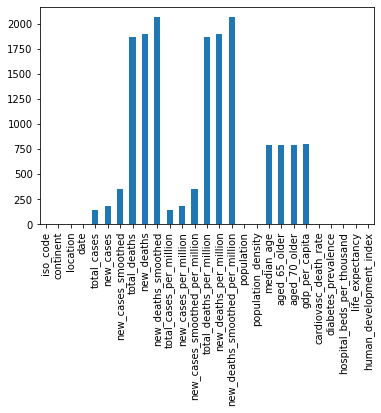

In [14]:
# Null values
covid_dataset_latam.isna().sum()[covid_dataset_latam.isna().sum()<covid_dataset_latam.shape[0]/10].plot(kind='bar')
covid_dataset_latam.isna().sum()[covid_dataset_latam.isna().sum()<covid_dataset_latam.shape[0]/10]

In [15]:
#covid_dataset_latam = covid_dataset_latam.loc[:,covid_dataset_latam.isna().sum()<covid_dataset_latam.shape[0]/10]
covid_dataset_latam.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
5705,ATG,North America,Antigua and Barbuda,2020-03-13,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.8,77.02,0.778,NaN,NaN,NaN,NaN
5706,ATG,North America,Antigua and Barbuda,2020-03-14,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.8,77.02,0.778,NaN,NaN,NaN,NaN
5707,ATG,North America,Antigua and Barbuda,2020-03-15,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.8,77.02,0.778,NaN,NaN,NaN,NaN


In [16]:
columns = ['location', 'date', 'population', 'population_density',
           'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 
           'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred']
covid_dataset_latam = covid_dataset_latam[columns]
covid_dataset_latam

,location,date,population,population_density,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
5705,Antigua and Barbuda,2020-03-13,98728.0,231.845,1.0,1.0,NaN,NaN,10.129,10.129,NaN,NaN,NaN,NaN,NaN
5706,Antigua and Barbuda,2020-03-14,98728.0,231.845,1.0,0.0,NaN,NaN,10.129,0.000,NaN,NaN,NaN,NaN,NaN
5707,Antigua and Barbuda,2020-03-15,98728.0,231.845,1.0,0.0,NaN,NaN,10.129,0.000,NaN,NaN,NaN,NaN,NaN
5708,Antigua and Barbuda,2020-03-16,98728.0,231.845,1.0,0.0,NaN,NaN,10.129,0.000,NaN,NaN,NaN,NaN,NaN
5709,Antigua and Barbuda,2020-03-17,98728.0,231.845,1.0,0.0,NaN,NaN,10.129,0.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184813,Venezuela,2022-05-22,28704947.0,36.253,523343.0,77.0,5716.0,0.0,18231.805,2.682,199.129,0.000,NaN,NaN,NaN
184814,Venezuela,2022-05-23,28704947.0,36.253,523377.0,34.0,5716.0,0.0,18232.990,1.184,199.129,0.000,NaN,NaN,NaN
184815,Venezuela,2022-05-24,28704947.0,36.253,523411.0,34.0,5717.0,1.0,18234.174,1.184,199.164,0.035,NaN,NaN,NaN
184816,Venezuela,2022-05-25,28704947.0,36.253,523411.0,0.0,5717.0,0.0,18234.174,0.000,199.164,0.000,NaN,NaN,NaN


# Covid deaths

In [17]:
# Get Columns:
covid_deaths_columns = ['location', 'date', 'new_deaths_per_million']
covid_deaths_latam = covid_dataset_latam[covid_deaths_columns]

# Drop null values
#covid_deaths_latam = covid_deaths_latam.fillna(0)
covid_deaths_latam = covid_deaths_latam.dropna()

covid_deaths_latam.isnull().sum()

location                  0
date                      0
new_deaths_per_million    0
dtype: int64

In [18]:
# Use pandas.to_datetime() to convert string to datetime format
covid_deaths_latam['date'] = pd.to_datetime(covid_deaths_latam['date'])
covid_deaths_latam.dtypes

location                          object
date                      datetime64[ns]
new_deaths_per_million           float64
dtype: object

In [19]:
covid_deaths_latam.head(5)

,location,date,new_deaths_per_million
5730,Antigua and Barbuda,2020-04-07,10.129
5731,Antigua and Barbuda,2020-04-08,10.129
5732,Antigua and Barbuda,2020-04-09,0.000
5733,Antigua and Barbuda,2020-04-10,0.000
5734,Antigua and Barbuda,2020-04-11,0.000


# Covid Cases

In [20]:
# Get Columns:
covid_cases_columns = ['location', 'date', 'new_cases_per_million']
covid_cases_latam = covid_dataset_latam[covid_cases_columns]

# Drop null values
#covid_cases_latam = covid_cases_latam.fillna(0)
covid_cases_latam = covid_cases_latam.dropna()

covid_cases_latam.isnull().sum()

location                 0
date                     0
new_cases_per_million    0
dtype: int64

In [21]:
# Use pandas.to_datetime() to convert string to datetime format
covid_cases_latam['date'] = pd.to_datetime(covid_cases_latam['date'])
covid_cases_latam.dtypes

location                         object
date                     datetime64[ns]
new_cases_per_million           float64
dtype: object

In [22]:
covid_cases_latam.head(5)

,location,date,new_cases_per_million
5705,Antigua and Barbuda,2020-03-13,10.129
5706,Antigua and Barbuda,2020-03-14,0.000
5707,Antigua and Barbuda,2020-03-15,0.000
5708,Antigua and Barbuda,2020-03-16,0.000
5709,Antigua and Barbuda,2020-03-17,0.000


# Vaccinations

In [23]:
# Get Columns:
covid_vaccinations_columns = ['location', 'date', 'people_vaccinated_per_hundred']
covid_vaccinations_latam = covid_dataset_latam[covid_vaccinations_columns]

# Drop null values
#covid_vaccinations_latam = covid_vaccinations_latam.fillna(0)
covid_vaccinations_latam = covid_vaccinations_latam.dropna()

covid_vaccinations_latam.isnull().sum()

location                         0
date                             0
people_vaccinated_per_hundred    0
dtype: int64

In [24]:
# Use pandas.to_datetime() to convert string to datetime format
covid_vaccinations_latam['date'] = pd.to_datetime(covid_vaccinations_latam['date'])
covid_vaccinations_latam.dtypes

location                                 object
date                             datetime64[ns]
people_vaccinated_per_hundred           float64
dtype: object

In [25]:
covid_vaccinations_latam.head(5)

,location,date,people_vaccinated_per_hundred
6045,Antigua and Barbuda,2021-02-16,0.00
6072,Antigua and Barbuda,2021-03-15,24.48
6076,Antigua and Barbuda,2021-03-19,26.01
6082,Antigua and Barbuda,2021-03-25,26.76
6088,Antigua and Barbuda,2021-03-31,27.18


# Convert dataframe to timeseries

In [26]:
# Covid cases in time
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (12, 8))
    plt.plot(x_axis, y_axis, color ='blue')
    plt.xlabel(x_label) 
    plt.ylabel('Covid Cases')
    plt.show()

In [27]:
def get_epiweek_df(df, dates):
    
    # Get first and last epiweek:
    first_week = epiweeks.Week.fromdate(dates.min())
    last_week = epiweeks.Week.fromdate(dates.max())
    
    complete_dates = np.arange(first_week.startdate(), last_week.enddate() + timedelta(days=7), timedelta(days=7)).astype('datetime64[D]')
    complete_dates = complete_dates.astype(datetime.date)
    
    epiweek_df = pd.DataFrame()
    
    for date in zip(complete_dates, complete_dates[1:]):
        
        first_date = date[0]
        last_date = date[1] - timedelta(days=1)
        actual_epiweek = epiweeks.Week.fromdate(first_date)  
        
        if actual_epiweek == first_week:
            week_dates = np.arange(dates.min(), last_date, timedelta(days=1)).astype('datetime64[D]')
            week_dates = week_dates.astype(datetime.date)
        
        elif actual_epiweek == last_week:
            week_dates = np.arange(first_date, dates.max(), timedelta(days=1)).astype('datetime64[D]')
            week_dates = week_dates.astype(datetime.date)
        
        else:
            week_dates = np.arange(first_date, last_date, timedelta(days=1)).astype('datetime64[D]')
            week_dates = week_dates.astype(datetime.date)
        
        epiweek_df[actual_epiweek] = df.loc[:,week_dates].sum(axis=1)
        
    return epiweek_df

In [28]:
def dataframe_to_timeseries(df, column, time_inverval=1, epi_week = False, display_country='Colombia'):
    
    
    # show time series:
    df_colombia = df.loc[df['location'].isin([display_country])]
    df_colombia.drop(columns=['location'], inplace=True)
    df_colombia = pd.DataFrame(df_colombia.groupby([df_colombia['date'].dt.date])[column].sum())
    
    text = 'Cases by Week in: ' + display_country
    timeseries(df_colombia.index, df_colombia.values, text)
    
    df = pd.DataFrame(df.groupby(['location', df['date'].dt.date])[column].sum())
    position_index = df.index.names.index('date')
    df = df.unstack(position_index)
    df = df.fillna(0)
    
    dates_aux = df.columns.values
    dates = []
    for date in dates_aux:
        dates.append(date[1])
    dates = np.array(dates)
    
    print(f'The first date is: {dates.min()}')
    print(f'The last date is: {dates.max()}')
    
    print(f'The numer of dates is: {dates.shape[0]}')
    complete_dates = np.arange(dates.min(), dates.max(), timedelta(days=1)).astype('datetime64[D]')
    complete_dates = complete_dates.astype(datetime.date)
    print(f'The numer of dates should be: {complete_dates.shape[0] + 1}')
    
    # Append columns with no cases
    if dates.shape[0] < (complete_dates.shape[0]):
        for date in complete_dates:
            if date not in dates:
                df[date] = 0.0
                #print(f'The date: {date} is not in the dataframe')
        # Sort columns
        df = df.sort_index(axis=1)
    
    if time_inverval == 1:
        df.columns.name = None
    
    df.columns = df.columns.droplevel(0)

    
    # Weekly use epiweek:
    if epi_week:
        first_week = epiweeks.Week.fromdate(dates.min())
        print(f'The first epiweek is: {first_week.week},{first_week.year}')
        last_week = epiweeks.Week.fromdate(dates.max())
        print(f'The last epiweek is: {last_week.week},{last_week.year}')

        epiweek_df = get_epiweek_df(df, complete_dates)
        
        return df, epiweek_df
    
    return df

# Generate daily and weekly covid cases in LATAM

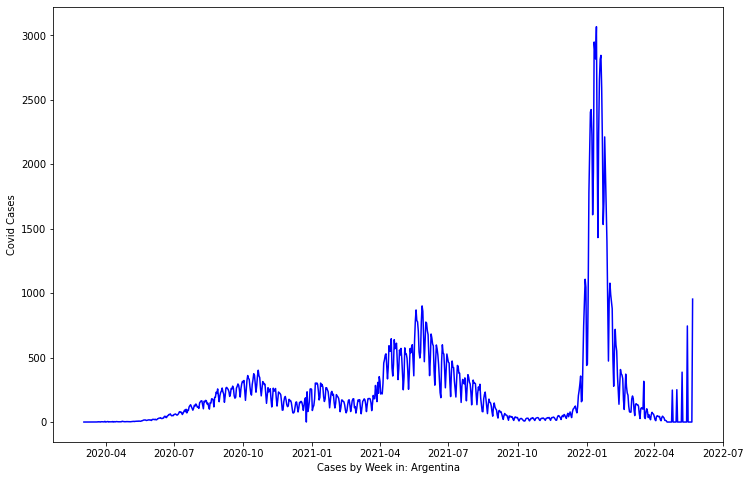

The first date is: 2020-02-23
The last date is: 2022-05-26
The numer of dates is: 824
The numer of dates should be: 824
The first epiweek is: 9,2020
The last epiweek is: 21,2022


date,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,...,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26
location,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,...,0.000,607.730,557.086,0.000,324.123,0.000,405.154,0.000,810.307,577.344
Argentina,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.022,...,0.000,0.000,0.000,0.000,0.000,953.541,0.000,0.000,0.000,0.000
Bahamas,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,...,80.622,55.428,123.452,221.710,161.244,156.205,73.064,131.011,0.000,317.449
Barbados,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,...,1630.125,1400.726,1289.502,1077.481,0.000,1637.076,451.847,1160.899,851.558,806.373
Belize,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,...,264.253,197.572,288.950,214.860,0.000,0.000,488.992,325.994,306.237,187.694
Bolivia,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,...,10.902,0.000,23.747,22.818,17.832,0.000,7.014,38.875,0.000,16.141
Brazil,0.000,0.0,0.0,0.005,0.0,0.000,0.005,0.000,0.0,0.000,...,0.000,0.000,0.000,282.780,0.000,134.616,59.698,153.369,67.180,137.018
Chile,0.104,0.0,0.0,0.000,0.0,0.000,0.000,0.364,0.0,0.052,...,128.823,267.380,361.174,356.645,325.415,319.742,219.910,193.365,318.129,451.480
Colombia,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,...,0.000,0.000,74.026,0.000,0.000,0.000,0.000,0.000,0.000,84.735


In [29]:
cases, cases_epiweek = dataframe_to_timeseries(df=covid_cases_latam, column="new_cases_per_million", time_inverval=1, epi_week=True, display_country='Argentina')
cases

In [30]:
cases_epiweek

,202009,202010,202011,202012,202013,202014,202015,202016,202017,202018,...,202212,202213,202214,202215,202216,202217,202218,202219,202220,202221
location,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,0.000,0.000,10.129,0.000,60.773,81.031,40.515,20.258,10.129,10.129,...,91.160,111.418,182.319,243.092,364.637,557.086,374.767,587.473,1914.350,405.154
Argentina,0.000,0.044,0.505,2.061,9.451,12.608,11.490,15.218,18.616,16.489,...,379.030,319.718,232.493,172.368,9.385,247.929,250.911,386.924,745.278,953.541
Bahamas,0.000,0.000,0.000,7.558,15.116,35.271,35.271,20.155,45.349,7.558,...,78.102,105.815,113.374,105.817,138.569,196.516,287.216,340.124,697.884,360.280
Barbados,0.000,0.000,0.000,17.378,62.563,86.894,52.136,24.330,6.952,6.952,...,2120.205,4257.789,5328.318,7730.060,8557.287,8015.071,9255.912,9200.300,7601.457,3249.822
Belize,0.000,0.000,0.000,0.000,4.940,4.940,14.819,12.349,0.000,0.000,...,217.329,143.240,71.620,32.106,217.330,192.634,284.010,701.381,1291.629,814.986
Bolivia,0.000,0.000,0.254,0.424,3.551,4.902,10.902,16.056,26.536,30.678,...,111.637,102.087,51.889,39.719,34.311,49.777,32.199,47.833,73.270,45.889
Brazil,0.005,0.051,0.645,3.000,11.196,24.075,43.358,60.539,81.240,153.639,...,866.074,651.468,607.332,469.796,414.125,407.647,447.079,496.319,375.334,347.683
Chile,0.104,0.572,2.185,19.415,55.850,95.147,121.795,121.017,134.081,216.008,...,2770.456,1764.280,1176.742,899.890,685.288,617.830,738.379,1032.096,1553.426,733.017
Colombia,0.000,0.020,0.234,2.653,6.691,12.856,20.815,14.239,24.579,36.360,...,45.917,38.602,35.599,32.068,24.637,25.532,19.077,32.595,74.026,0.000


### Download cases LATAM

In [31]:
cases.to_csv('./' + out_dir + '/daily_covid_cases_latam.csv',index=True)
cases_epiweek.to_csv('./' + out_dir + '/weekly_covid_cases_latam.csv',index=True)

# Generate daily and weekly covid deaths in LATAM

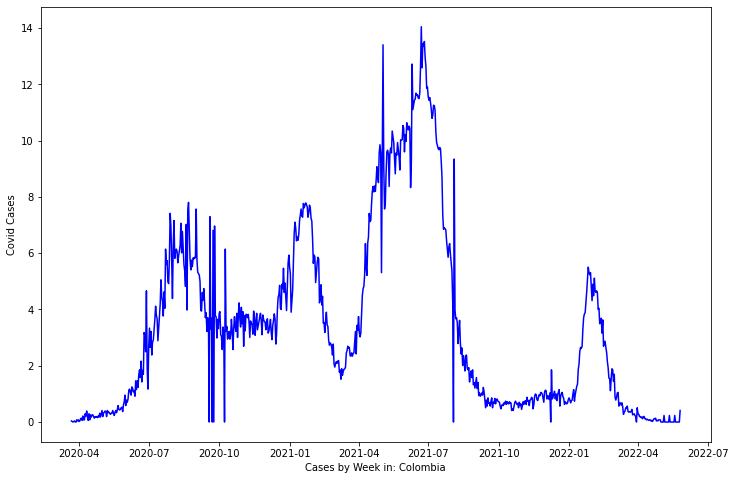

The first date is: 2020-03-06
The last date is: 2022-05-26
The numer of dates is: 812
The numer of dates should be: 812
The first epiweek is: 10,2020
The last epiweek is: 21,2022


date,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,...,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26
location,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,0.00,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.00,...,0.000,10.129,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Argentina,0.00,0.0,0.022,0.0,0.0,0.000,0.000,0.022,0.000,0.00,...,0.000,0.000,0.000,0.000,0.000,1.074,0.000,0.000,0.000,0.000
Bahamas,0.00,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,22.675,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Barbados,0.00,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.00,...,0.000,3.476,0.000,3.476,0.000,13.903,0.000,10.427,3.476,0.000
Belize,0.00,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.00,...,0.000,2.470,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Bolivia,0.00,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,0.000,0.000,0.085,0.000,0.085,0.000,0.000,0.085
Brazil,0.00,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,0.000,2.365,0.000,0.626,0.173,1.112,0.617,0.000
Chile,0.00,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.00,...,0.416,1.093,0.677,0.781,0.625,0.416,0.416,0.156,1.145,0.833
Colombia,0.00,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,0.234,0.000,0.000,0.000,0.000,0.000,0.000,0.410


In [32]:
deaths, deaths_epiweek = dataframe_to_timeseries(df=covid_deaths_latam, column="new_deaths_per_million", time_inverval=1, epi_week=True, display_country='Colombia')
deaths

In [33]:
deaths_epiweek

,202010,202011,202012,202013,202014,202015,202016,202017,202018,202019,...,202212,202213,202214,202215,202216,202217,202218,202219,202220,202221
location,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,0.00,0.000,0.000,0.000,0.000,20.258,10.129,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,10.129,10.129,0.000,10.129,0.000
Argentina,0.00,0.044,0.022,0.198,0.461,0.854,0.876,1.031,0.876,1.227,...,7.958,3.246,2.960,2.849,0.000,4.342,2.434,1.666,1.031,1.074
Bahamas,0.00,0.000,0.000,0.000,2.519,10.076,2.519,5.039,0.000,0.000,...,27.713,0.000,2.519,0.000,0.000,0.000,0.000,5.039,22.675,0.000
Barbados,0.00,0.000,0.000,0.000,0.000,13.904,3.476,3.476,3.476,0.000,...,10.427,156.409,6.952,6.951,17.378,10.427,31.282,93.845,10.428,24.330
Belize,0.00,0.000,0.000,0.000,0.000,4.940,0.000,0.000,0.000,0.000,...,0.000,4.939,9.879,29.636,9.879,0.000,0.000,0.000,2.470,0.000
Bolivia,0.00,0.000,0.000,0.000,0.763,0.763,0.931,1.101,1.691,2.959,...,0.424,34.481,0.254,0.169,0.340,0.255,1.269,0.085,0.000,0.085
Brazil,0.00,0.000,0.051,0.360,1.159,2.860,4.753,6.309,11.004,15.215,...,6.850,5.697,4.701,3.174,2.883,3.711,2.757,3.042,2.888,1.911
Chile,0.00,0.000,0.000,0.260,0.832,1.976,2.238,2.497,2.757,2.445,...,17.438,17.645,13.845,10.826,6.245,6.975,4.529,3.539,3.539,0.988
Colombia,0.00,0.000,0.000,0.118,0.371,0.938,1.036,1.152,1.582,2.029,...,2.147,1.522,1.034,0.547,0.391,0.430,0.234,0.234,0.234,0.000


### Download deaths LATAM

In [34]:
deaths.to_csv('./' + out_dir + '/daily_covid_deaths_latam.csv',index=True)
deaths_epiweek.to_csv('./' + out_dir + '/weekly_covid_deaths_latam.csv',index=True)

In [35]:
pd.read_csv(out_dir + '/weekly_covid_deaths_latam.csv')

,location,202010,202011,202012,202013,202014,202015,202016,202017,202018,...,202212,202213,202214,202215,202216,202217,202218,202219,202220,202221
0,Antigua and Barbuda,0.00,0.000,0.000,0.000,0.000,20.258,10.129,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,10.129,10.129,0.000,10.129,0.000
1,Argentina,0.00,0.044,0.022,0.198,0.461,0.854,0.876,1.031,0.876,...,7.958,3.246,2.960,2.849,0.000,4.342,2.434,1.666,1.031,1.074
2,Bahamas,0.00,0.000,0.000,0.000,2.519,10.076,2.519,5.039,0.000,...,27.713,0.000,2.519,0.000,0.000,0.000,0.000,5.039,22.675,0.000
3,Barbados,0.00,0.000,0.000,0.000,0.000,13.904,3.476,3.476,3.476,...,10.427,156.409,6.952,6.951,17.378,10.427,31.282,93.845,10.428,24.330
4,Belize,0.00,0.000,0.000,0.000,0.000,4.940,0.000,0.000,0.000,...,0.000,4.939,9.879,29.636,9.879,0.000,0.000,0.000,2.470,0.000
5,Bolivia,0.00,0.000,0.000,0.000,0.763,0.763,0.931,1.101,1.691,...,0.424,34.481,0.254,0.169,0.340,0.255,1.269,0.085,0.000,0.085
6,Brazil,0.00,0.000,0.051,0.360,1.159,2.860,4.753,6.309,11.004,...,6.850,5.697,4.701,3.174,2.883,3.711,2.757,3.042,2.888,1.911
7,Chile,0.00,0.000,0.000,0.260,0.832,1.976,2.238,2.497,2.757,...,17.438,17.645,13.845,10.826,6.245,6.975,4.529,3.539,3.539,0.988
8,Colombia,0.00,0.000,0.000,0.118,0.371,0.938,1.036,1.152,1.582,...,2.147,1.522,1.034,0.547,0.391,0.430,0.234,0.234,0.234,0.000
9,Costa Rica,0.00,0.000,0.195,0.000,0.000,0.195,0.195,0.390,0.000,...,7.784,8.173,3.697,5.838,5.059,4.281,3.113,4.476,5.448,4.476


# Generate daily and weekly covid vaccinations in LATAM

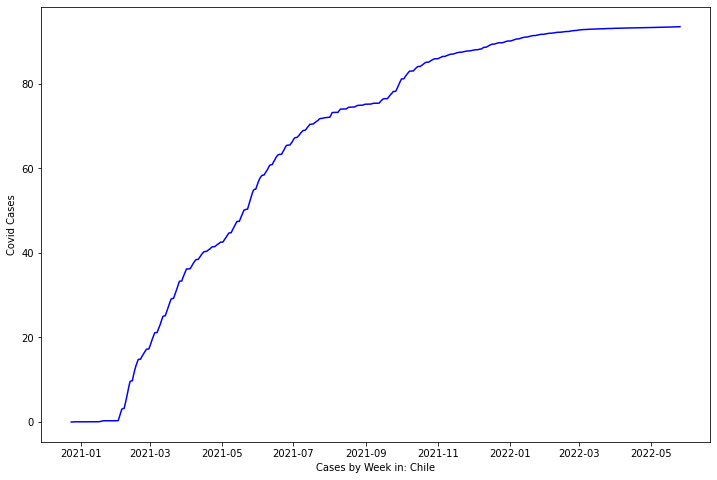

The first date is: 2020-12-24
The last date is: 2022-05-26
The numer of dates is: 519
The numer of dates should be: 519
The first epiweek is: 52,2020
The last epiweek is: 21,2022


date,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,...,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26
location,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Argentina,0.0,0.00,0.00,0.00,0.00,0.04,0.09,0.1,0.1,0.1,...,90.07,90.07,90.08,90.08,90.09,90.09,90.09,90.10,90.10,0.00
Bahamas,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Barbados,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,56.35,56.37,56.38,0.00,56.39,0.00,56.40,56.41,56.42,0.00
Belize,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,58.65,0.00,0.00,0.00,0.00,0.00,0.00
Bolivia,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,60.76,60.77,60.78,60.80,60.81,60.81,60.82,0.00,0.00,0.00
Brazil,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,85.61,85.63,85.63,85.64,0.00,0.00,0.00,0.00,85.84
Chile,0.0,0.03,0.04,0.05,0.00,0.00,0.00,0.0,0.0,0.0,...,93.37,93.38,93.40,93.41,93.41,93.41,93.42,93.44,93.45,93.46
Colombia,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [36]:
vaccinations, vaccinations_epiweek = dataframe_to_timeseries(df=covid_vaccinations_latam, column="people_vaccinated_per_hundred", time_inverval=1, epi_week=True, display_country='Chile')
vaccinations

In [37]:
vaccinations_epiweek

,202052,202053,202101,202102,202103,202104,202105,202106,202107,202108,...,202212,202213,202214,202215,202216,202217,202218,202219,202220,202221
location,,,,,,,,,,,,,,,,,,,,,
Antigua and Barbuda,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,64.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Argentina,0.00,0.33,1.03,2.40,3.30,3.68,3.99,4.79,5.58,9.98,...,538.54,538.89,539.23,539.47,539.64,539.86,540.04,540.25,540.43,270.28
Bahamas,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,41.56,41.67,0.00,0.00,41.88,41.94,0.00,0.00,0.00,0.00
Barbados,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06,50.80,...,335.44,223.96,224.16,224.41,336.94,337.20,281.18,281.48,281.76,112.81
Belize,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,58.29,58.36,0.00,58.48,58.50,58.55,58.58,58.62,58.65,0.00
Bolivia,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.32,0.00,0.37,...,357.74,358.95,359.84,360.45,362.25,363.10,363.57,364.12,364.59,121.63
Brazil,0.00,0.00,0.00,0.00,0.37,3.40,7.56,11.81,15.24,17.29,...,506.23,422.99,508.88,424.78,425.69,511.67,512.36,513.10,428.03,0.00
Chile,0.03,0.05,0.22,0.26,1.23,1.20,7.42,38.24,75.24,96.54,...,557.90,558.30,558.63,558.95,559.16,559.42,559.67,559.95,560.27,280.27
Colombia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,81.71,327.40,492.34,0.00,0.00,82.12,82.19,82.35,0.00,0.00


### Download cases LATAM

In [38]:
vaccinations.to_csv('./' + out_dir + '/daily_covid_vaccinations_latam.csv',index=True)
vaccinations_epiweek.to_csv('./' + out_dir + '/weekly_covid_vaccinations_latam.csv',index=True)